In [1]:
import numpy as np
from IPython.display import Audio
from matplotlib import pyplot as plt
import nibabel as nib
from neurovolume.functions import explore_3D_vol, explore_4D_vol, create_normalized_volume

so here's the logic:

- Each voxel in the tensor will write a frequency: the higher the density value the higher the pitch
- We will then add all of these together to create the output audio
- Thus: the more activations we have the louder it is, and the higher the activations are the 
- To save memory, etc, we will have to draw from the raw, low-time-frequency, nibabel files.
    - as such, we will have to interpolate frequencies from "point to point" like we did in the cross-dissolve interpolation

In [19]:
tensor_img = nib.load('/Users/joachimpfefferkorn/repos/neurovolume/media/openneuro/sub-01_task-emotionalfaces_run-1_bold.nii')
tensor_seq = tensor_img.get_fdata()
tensor_hdr = tensor_img.header
print(tensor_seq.shape)

(64, 64, 35, 185)


let's extract  single voxel and test it

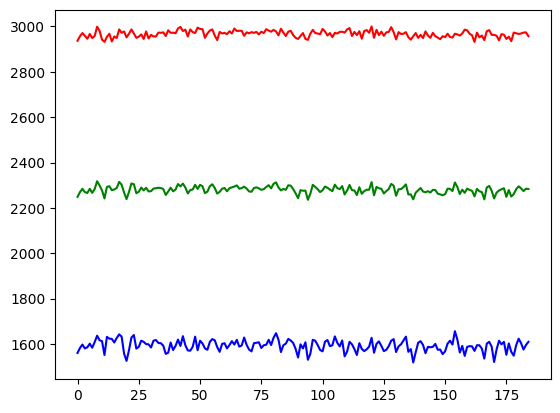

In [3]:
note1_density = tensor_seq[int(tensor_seq.shape[0]/2), int(tensor_seq.shape[1]/2), int(tensor_seq.shape[2]/2), :]
note2_density = tensor_seq[int(tensor_seq.shape[0]/2) + 10, int(tensor_seq.shape[1]/2) + 10, int(tensor_seq.shape[2]/2), :]
combined = (note1_density + note2_density) / 2

plt.plot(note1_density, linestyle='-', color='b')
plt.plot(note2_density, linestyle='-', color='r')
plt.plot(combined, linestyle='-', color='g')

can we turn these into notes?

In [8]:
def density_to_frequency(voxel, dpf, sampling_rate = 48000, min_freq=220, max_freq=880):
    """
    Voxel must be 1D
    """
    # A lot of this was written with GPT help but I think I understand it fairly well
    audio_signal = np.array([])
    #np.array((arr - np.min(arr)) / (np.max(arr) - np.min(arr)))
    normalized_amps = np.array(voxel - np.min(voxel) / np.ptp(voxel)) # I believe ptp is equivalent to (np.max(voxel) - np.min(voxel))))
    frequencies = min_freq + normalized_amps * (max_freq - min_freq)
    t = np.linspace(0, dps, int(sampling_rate * dps), endpoint=False) #this I'm shaky on
    for freq in frequencies:
        wave = np.sin(2 * np.pi * freq * t) #also shaky on this!
        audio_signal = np.concatenate((audio_signal, wave))
    return audio_signal

In [20]:
dpf = tensor_hdr['pixdim'][4]

Let's see how it looks for the whole shebang?

In [4]:
#explore_3D_vol(tensor_seq[:,:,:,1])
print(tensor_seq[:,:,:,1].shape)
print(tensor_seq.shape[3])
print(tensor_seq.min(), tensor_seq.max())


(64, 64, 35)
185
0.0 6465.0


In [5]:
norm_tensor_seq = create_normalized_volume(tensor_seq)
print(norm_tensor_seq.min(), norm_tensor_seq.max())

0.0 1.0


In [6]:
pitches = []
for x in range(norm_tensor_seq.shape[0]):
    for y in range(norm_tensor_seq.shape[1]):
        for z in range(norm_tensor_seq.shape[2]):
#            densities.append(norm_tensor_seq[x,y,z,:])
#            print(type(norm_tensor_seq[x,y,z,:]))
            pitches.append(norm_tensor_seq[x,y,z,:])
#            plt.plot(norm_tensor_seq[x,y,z,:])

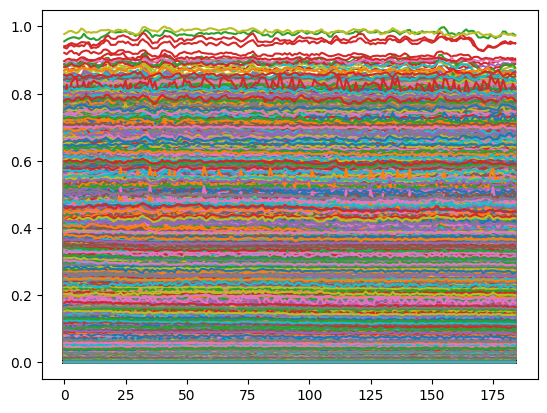

In [ ]:
#warning: this takes two minutes or so
for pitch in pitches:
    plt.plot(pitch)

In [ ]:
print(len(pitches))
print(64*64*35)

In [ ]:
note1 = density_to_frequency(note1_density)

In [ ]:
sampling_rate = 48000
Audio(note1, rate=sampling_rate)

In [ ]:
plt.plot(note1[:200], linestyle='-', color='b')